## Lesson-Combining Data with Pandas 
Often, we need additional data to perform analysis or we have the data, but need to pull it from mulitiple sources. In this lesson, we'll learn a couple of different techniques for combining data using pandas to easily handle situations like these.


### Combining Dataframes with Concat Function

In [1]:
import numpy as np
import pandas as pd
happiness2015 = pd.read_csv("World_Happiness_2015.csv")
happiness2016 = pd.read_csv("World_Happiness_2016.csv")
happiness2017 = pd.read_csv("World_Happiness_2017.csv")
happiness2015['Year']=2015
happiness2016['Year']=2016
happiness2017['Year']=2017

In [3]:
head_2015 = happiness2015[['Country','Happiness Score', 'Year']].head(3)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)
concat_axis0=pd.concat([head_2015,head_2016],axis=0)
concat_axis1=pd.concat([head_2015,head_2016],axis=1)

print(concat_axis0)
print(concat_axis1)

       Country  Happiness Score  Year
0  Switzerland            7.587  2015
1      Iceland            7.561  2015
2      Denmark            7.527  2015
0      Denmark            7.526  2016
1  Switzerland            7.509  2016
2      Iceland            7.501  2016
       Country  Happiness Score  Year      Country  Happiness Score  Year
0  Switzerland            7.587  2015      Denmark            7.526  2016
1      Iceland            7.561  2015  Switzerland            7.509  2016
2      Denmark            7.527  2015      Iceland            7.501  2016


### Combining Dataframes with different Dimensions(Shapes)

In [5]:
head_2015 = happiness2015[['Year','Country','Happiness Score', 'Standard Error']].head(4)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)
concat_axis0=pd.concat([head_2015,head_2016],axis=0)
print(concat_axis0)


   Year      Country  Happiness Score  Standard Error
0  2015  Switzerland            7.587         0.03411
1  2015      Iceland            7.561         0.04884
2  2015      Denmark            7.527         0.03328
3  2015       Norway            7.522         0.03880
0  2016      Denmark            7.526             NaN
1  2016  Switzerland            7.509             NaN
2  2016      Iceland            7.501             NaN


### Resetting the Index
Use `ignore_index=True`

In [6]:
head_2015 = happiness2015[['Year','Country','Happiness Score', 'Standard Error']].head(4)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)
concat_axis0=pd.concat([head_2015,head_2016],axis=0,ignore_index=True)
print(concat_axis0)

   Year      Country  Happiness Score  Standard Error
0  2015  Switzerland            7.587         0.03411
1  2015      Iceland            7.561         0.04884
2  2015      Denmark            7.527         0.03328
3  2015       Norway            7.522         0.03880
4  2016      Denmark            7.526             NaN
5  2016  Switzerland            7.509             NaN
6  2016      Iceland            7.501             NaN


### Joining Dataframes using Merge Function
Next, we'll explore the (`pd.merge()` function)[https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html] - a function that can execute high performance database-style joins. Note that unlike the concat function, the merge function only combines dataframes horizontally (axis=1) and can only combine two dataframes at a time. However, it can be valuable when we need to combine very large dataframes quickly and provides more flexibility in terms of how data can be combined.

In [7]:
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
merged=pd.merge(left=three_2015,right=three_2016,on='Country')
print(merged)

  Country  Happiness Rank_x  Year_x  Happiness Rank_y  Year_y
0  Norway                 4    2015                 4    2016


### Inner Join
The one country returned above in merged was "Norway", the only element that appeared in the Country column in BOTH three_2015 and three_2016.
This way of combining, or joining, data is called an `inner join`. An `inner join` returns only the intersection of the keys, or the elements that appear in both dataframes with a common key.

### Join Types
There are actually four different types of joins:
`Inner`: only includes elements that appear in both dataframes with a common key
`Outer`: includes all data from both dataframes
`Left`: includes all of the rows from the "left" dataframe along with any rows from the "right" dataframe with a common key; the result retains all columns from both of the original dataframes
`Right`: includes all of the rows from the "right" dataframe along with any rows from the "left" dataframe with a common key; the result retains all columns from both of the original dataframes

In [9]:
merged_left=pd.merge(left=three_2015, right=three_2016, on='Country',how='left')
merged_left_updated=pd.merge(left=three_2016, right=three_2015, on='Country',how='left')
print(merged_left)
print(merged_left_updated)

   Country  Happiness Rank_x  Year_x  Happiness Rank_y  Year_y
0  Denmark                 3    2015               NaN     NaN
1   Norway                 4    2015               4.0  2016.0
2   Canada                 5    2015               NaN     NaN
   Country  Happiness Rank_x  Year_x  Happiness Rank_y  Year_y
0  Iceland                 3    2016               NaN     NaN
1   Norway                 4    2016               4.0  2015.0
2  Finland                 5    2016               NaN     NaN


### Updating Suffixes

In [12]:
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
merged = pd.merge(left=three_2015, right=three_2016, how='left', on='Country')
merged_updated = pd.merge(left=three_2016, right=three_2015, how = 'left', on='Country')
merged_updated_suffixes = pd.merge(left=three_2016, right=three_2015, how = 'left', on='Country',suffixes=('-2016','-2015'))
merged_suffixes = pd.merge(left=three_2015, right=three_2016, how = 'left', on='Country',suffixes=('-2015','-2016'))   
print(merged_suffixes)
print(merged_updated_suffixes)

   Country  Happiness Rank-2015  Year-2015  Happiness Rank-2016  Year-2016
0  Iceland                    3       2016                  NaN        NaN
1   Norway                    4       2016                  4.0     2015.0
2  Finland                    5       2016                  NaN        NaN
   Country  Happiness Rank-2016  Year-2016  Happiness Rank-2015  Year-2015
0  Iceland                    3       2016                  NaN        NaN
1   Norway                    4       2016                  4.0     2015.0
2  Finland                    5       2016                  NaN        NaN


In [13]:
import pandas as pd
four_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:6]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
#merge only common index using inner join
merge_index = pd.merge(left = four_2015,right = three_2016, left_index = True, right_index = True, suffixes = ('_2015','_2016'))
#predict columns and rows from merging on left index (correct)
rows=4 
columns=6
#merge on left index using inner join
merge_index_left=pd.merge(left = four_2015,right = three_2016,how='left', left_index = True, right_index = True, suffixes = ('_2015','_2016'))
print(merge_index)
print(merge_index_left)

  Country_2015  Happiness Rank_2015  Year_2015 Country_2016  \
2      Denmark                    3       2015      Iceland   
3       Norway                    4       2015       Norway   
4       Canada                    5       2015      Finland   

   Happiness Rank_2016  Year_2016  
2                    3       2016  
3                    4       2016  
4                    5       2016  
  Country_2015  Happiness Rank_2015  Year_2015 Country_2016  \
2      Denmark                    3       2015      Iceland   
3       Norway                    4       2015       Norway   
4       Canada                    5       2015      Finland   
5      Finland                    6       2015          NaN   

   Happiness Rank_2016  Year_2016  
2                  3.0     2016.0  
3                  4.0     2016.0  
4                  5.0     2016.0  
5                  NaN        NaN  


In [27]:
happiness2017.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)

combined=pd.concat([happiness2015,happiness2016,happiness2017],axis=0)
print(combined.head(3))

       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe             1.0            7.587   
1      Iceland  Western Europe             2.0            7.561   
2      Denmark  Western Europe             3.0            7.527   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  ...  \
0                   0.94143  0.66557                        0.41978  ...   
1                   0.94784  0.62877                        0.14145  ...   
2                   0.87464  0.64938                        0.48357  ...   

   Year  Lower Confidence Interval  Upper Confidence Interval  Happiness.Rank  \
0  2015                        NaN                        NaN             NaN   
1  2015                        NaN     

In [26]:
combined. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
 12  Year                           158 non-null    int

In [19]:
happiness2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
 12  Year                           155 non-null    int

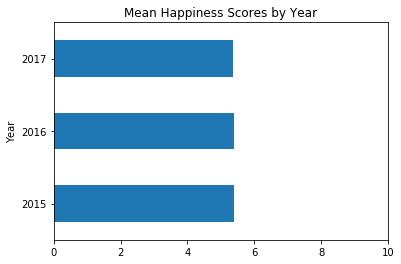

In [29]:
pivot_table_combined=combined.pivot_table(values='Happiness Score', index='Year', aggfunc=np.mean)
pivot_table_combined.plot(kind='barh',title='Mean Happiness Scores by Year', xlim=(0,10), legend=False)

### `df.append()` and `df.join()` methods
are basically shortcuts for the concat() and merge() functions. In order to learn more about them, check out this (documentation)[https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html]